주어진 사용자가 어떤 쿠폰을 구입할 지 맞추는 문제

사용자에 대해 알 수 있는 정보

- 가입일
- 해지일
- 성별
- 나이
- 사는 곳
- 과거 구매한 쿠폰
- 방문(검색)했던 쿠폰

In [1]:
coupon = pd.read_csv("../data/coupon_list_train.csv",index_col=0)
visit = pd.read_csv("../data/coupon_visit_train.csv")
user = pd.read_csv("../data/user_list.csv",index_col=0)
len(coupon)

19413

In [2]:
VIEW_COUPON_ID_hash = list(set(visit['VIEW_COUPON_ID_hash']))
print('visit테이블의 row수 : ' ,len(visit))
print('visit테이블의 unique한 COUPON_ID 갯수 : ' ,len(VIEW_COUPON_ID_hash))

visit테이블의 row수 :  2833180
visit테이블의 unique한 COUPON_ID 갯수 :  32628


In [3]:
purchase = pd.read_csv('../data/coupon_detail_train.csv',index_col=0)
Pur_COUPON_ID_hash = list(set(list(purchase['COUPON_ID_hash'])))

print('purchase테이블의 row수 : ' ,len(purchase))
print('purchase테이블의 unique한 COUPON_ID 갯수 : ' ,len(Pur_COUPON_ID_hash))

purchase테이블의 row수 :  168996
purchase테이블의 unique한 COUPON_ID 갯수 :  19368


In [4]:
print("샀지만 visit테이블에 없는 COUPON_ID :")

for ID in Pur_COUPON_ID_hash:
    if ID not in VIEW_COUPON_ID_hash:
        print(ID)

샀지만 visit테이블에 없는 COUPON_ID :
2c27645cf493b4188045f7ebae28e08e


In [5]:
c=0
for ID in list(purchase['COUPON_ID_hash']):
    if ID == '2c27645cf493b4188045f7ebae28e08e':
        c+=1
        
print('샀지만 visit테이블에 없는 COUPON_ID의 갯수 : ',c)

샀지만 visit테이블에 없는 COUPON_ID의 갯수 :  1


In [6]:
print("visit테이블에 있지만 안 산 COUPON_ID의 유니크한 갯 수 :")
c=0
for ID in VIEW_COUPON_ID_hash:
    if ID not in Pur_COUPON_ID_hash:
        c+=1
c

visit테이블에 있지만 안 산 COUPON_ID의 유니크한 갯 수 :


13261

In [7]:
# print("visit테이블에 있지만 안 산 COUPON_ID의 갯수 :")
# c=0
# for ID in list(visit['VIEW_COUPON_ID_hash']):
#     if ID not in Pur_COUPON_ID_hash:
#         c+=1
# c

In [8]:
pd.set_option('display.max_columns', None)
train1 = pd.merge(visit, coupon, left_on="VIEW_COUPON_ID_hash", right_on="COUPON_ID_hash")
train1 = pd.merge(train1, user, left_on="USER_ID_hash", right_on="USER_ID_hash")
train1.tail()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME
2517201,0,2011-11-24 01:41:06,5,a98782d22b202aeb125df634ebb54af5,5febdd370f0f8e64b9be29b418ab06c5,5fc8a0b419f579e539d28c63f3d44b7b,c8fe36e124025dfa8e9bf69ba20a44bb,NaN,Spa,Spa,73,36800,9800,2011-11-22 12:00:00,2011-11-25 12:00:00,3,2011-11-26,2012-05-22,178.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,2011-09-26 00:48:26,f,39,NaN,Fukuoka Prefecture
2517202,0,2011-11-24 01:42:30,6,16d6baf62216af5d3c00f7fae9b3b63f,5febdd370f0f8e64b9be29b418ab06c5,5fc8a0b419f579e539d28c63f3d44b7b,c8fe36e124025dfa8e9bf69ba20a44bb,NaN,Spa,Spa,73,36800,9800,2011-11-22 12:00:00,2011-11-25 12:00:00,3,2011-11-26,2012-05-22,178.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,2011-09-26 00:48:26,f,39,NaN,Fukuoka Prefecture
2517203,0,2011-11-24 01:42:33,7,16d6baf62216af5d3c00f7fae9b3b63f,5febdd370f0f8e64b9be29b418ab06c5,5fc8a0b419f579e539d28c63f3d44b7b,c8fe36e124025dfa8e9bf69ba20a44bb,NaN,Spa,Spa,73,36800,9800,2011-11-22 12:00:00,2011-11-25 12:00:00,3,2011-11-26,2012-05-22,178.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,2011-09-26 00:48:26,f,39,NaN,Fukuoka Prefecture
2517204,1,2011-08-02 20:58:06,7,6c5616ced18d79fa5a97c5c8f3e65f8f,7f7f124e5b2a82e1dd3453d21b3eba49,295ce0aacf52e06ecde42ae6b386aef4,819c00b621edd675903b7312094cd15d,357c8afd0683faa0d892cb081559c822,Spa,Spa,57,10500,4500,2011-08-01 12:00:00,2011-08-03 12:00:00,2,2011-08-04,2012-01-30,179.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,Kanto,Tokyo,"Shibuya, Aoyama, Jiyugaoka",7f7f124e5b2a82e1dd3453d21b3eba49,2010-11-11 21:24:29,f,25,NaN,NaN
2517205,1,2011-10-21 23:06:15,19,6c5616ced18d79fa5a97c5c8f3e65f8f,e94cbaf8b9848ad2c6b5bc243965f7c8,e497d37b6d8b78d3382177f43a9d22a6,e31e28d5c9f4c3f4ca77f19a1ff28c61,3dcf4ece4ace78dff5779e27ad7b682a,Hair salon,Hair salon,61,15330,5970,2011-10-20 12:00:00,2011-10-22 12:00:00,2,2011-10-23,2011-12-29,67.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,China,Okayama Prefecture,Okayama,e94cbaf8b9848ad2c6b5bc243965f7c8,2011-10-21 23:03:07,f,53,NaN,NaN


In [9]:
train1 = train1.drop(['I_DATE', 'PAGE_SERIAL', 'REFERRER_hash',
       'VIEW_COUPON_ID_hash', 'SESSION_ID_hash',
       'PURCHASEID_hash', 'PRICE_RATE',
       'CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPFROM','DISPEND',
       'VALIDFROM','VALIDEND', 'USABLE_DATE_MON',
       'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU',
       'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN',
       'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY', 'REG_DATE', 'WITHDRAW_DATE',],axis=1)
train1.tail()


,PURCHASE_FLG,USER_ID_hash,CAPSULE_TEXT,GENRE_NAME,DISPPERIOD,VALIDPERIOD,large_area_name,ken_name,small_area_name,COUPON_ID_hash,SEX_ID,AGE,PREF_NAME
2517201,0,5fc8a0b419f579e539d28c63f3d44b7b,Spa,Spa,3,178.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,f,39,Fukuoka Prefecture
2517202,0,5fc8a0b419f579e539d28c63f3d44b7b,Spa,Spa,3,178.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,f,39,Fukuoka Prefecture
2517203,0,5fc8a0b419f579e539d28c63f3d44b7b,Spa,Spa,3,178.0,Kyushu-Okinawa,Fukuoka Prefecture,Fukuoka,5febdd370f0f8e64b9be29b418ab06c5,f,39,Fukuoka Prefecture
2517204,1,295ce0aacf52e06ecde42ae6b386aef4,Spa,Spa,2,179.0,Kanto,Tokyo,"Shibuya, Aoyama, Jiyugaoka",7f7f124e5b2a82e1dd3453d21b3eba49,f,25,NaN
2517205,1,e497d37b6d8b78d3382177f43a9d22a6,Hair salon,Hair salon,2,67.0,China,Okayama Prefecture,Okayama,e94cbaf8b9848ad2c6b5bc243965f7c8,f,53,NaN


In [10]:
# userID = '5fc8a0b419f579e539d28c63f3d44b7b'
# tmp = train1.copy()
# train2 = tmp[tmp['USER_ID_hash'] == userID]


In [11]:
train1 = train1.drop(['USER_ID_hash'],axis=1)
train1

,PURCHASE_FLG,CAPSULE_TEXT,GENRE_NAME,DISPPERIOD,VALIDPERIOD,large_area_name,ken_name,small_area_name,COUPON_ID_hash,SEX_ID,AGE,PREF_NAME
0,0,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,f,25,NaN
1,0,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,f,25,NaN
2,0,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,f,25,NaN
3,1,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,f,25,NaN
4,0,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Shinjuku, Takadanobaba Nakano - Kichijoji",34c48f84026e08355dc3bd19b427f09a,f,25,NaN
5,0,Delivery service,Delivery service,3,NaN,Kansai,Hyogo Prefecture,Hyogo,17c450c3b470c045d35ec22b02daa690,f,25,NaN
6,0,Delivery service,Delivery service,3,NaN,Kanto,Saitama Prefecture,Saitama,91a15e6a95d09e5e01b50747833b317d,f,25,NaN
7,0,Delivery service,Delivery service,3,NaN,Kanto,Saitama Prefecture,Saitama,91a15e6a95d09e5e01b50747833b317d,f,25,NaN
8,0,Delivery service,Delivery service,3,NaN,Kanto,Saitama Prefecture,Saitama,91a15e6a95d09e5e01b50747833b317d,f,25,NaN
9,0,Delivery service,Delivery service,4,NaN,Kanto,Tokyo,"Ginza Shinbashi, Tokyo, Ueno",96fcbc8f6e45d5a2de1661eb140c6e82,f,25,NaN


In [12]:
train_y = train1['PURCHASE_FLG']
train_y

0          0
1          0
2          0
3          1
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
2517176    0
2517177    0
2517178    1
2517179    0
2517180    0
2517181    0
2517182    0
2517183    0
2517184    0
2517185    1
2517186    0
2517187    1
2517188    0
2517189    1
2517190    0
2517191    0
2517192    0
2517193    0
2517194    0
2517195    0
2517196    1
2517197    0
2517198    0
2517199    0
2517200    1
2517201    0
2517202    0
2517203    0
2517204    1
2517205    1
Name: PURCHASE_FLG, Length: 2517206, dtype: int64

In [13]:
train1.columns

Index(['PURCHASE_FLG', 'CAPSULE_TEXT', 'GENRE_NAME', 'DISPPERIOD',
       'VALIDPERIOD', 'large_area_name', 'ken_name', 'small_area_name',
       'COUPON_ID_hash', 'SEX_ID', 'AGE', 'PREF_NAME'],
      dtype='object')

In [14]:
category = ['CAPSULE_TEXT', 'GENRE_NAME', 'large_area_name', 'ken_name', 'small_area_name',
       'COUPON_ID_hash', 'SEX_ID' ,'PREF_NAME']

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(train1['CAPSULE_TEXT'])
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1),1)
integer_encoded1

array([[ 3],
       [ 3],
       [ 3],
       ...,
       [21],
       [21],
       [ 8]])

In [16]:
label_encoder = LabelEncoder()
integer_encoded2 = label_encoder.fit_transform(train1['GENRE_NAME'])
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded1),1)
integer_encoded2

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [12],
       [12],
       [ 4]])

In [17]:
label_encoder = LabelEncoder()
integer_encoded3 = label_encoder.fit_transform(train1['large_area_name'])
integer_encoded3 = integer_encoded3.reshape(len(integer_encoded1),1)
integer_encoded3

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [0]])

In [18]:
label_encoder = LabelEncoder()
integer_encoded4 = label_encoder.fit_transform(train1['ken_name'])
integer_encoded4 = integer_encoded4.reshape(len(integer_encoded1),1)
integer_encoded4

array([[40],
       [40],
       [40],
       ...,
       [ 6],
       [40],
       [30]])

In [19]:
label_encoder =LabelEncoder()
integer_encoded5 = label_encoder.fit_transform(train1['small_area_name'])
integer_encoded5 = integer_encoded5.reshape(len(integer_encoded1),1)
integer_encoded5

array([[42],
       [42],
       [42],
       ...,
       [ 8],
       [39],
       [35]])

In [20]:
label_encoder =LabelEncoder()
integer_encoded6 = label_encoder.fit_transform(train1['SEX_ID'])
integer_encoded6 = integer_encoded6.reshape(len(integer_encoded1),1)
integer_encoded6

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [21]:
numeric1 = np.array(train1['DISPPERIOD'])
numeric1 = numeric1.reshape(len(integer_encoded1),1)
numeric1[np.isnan(numeric1)] = 0
numeric1

array([[4],
       [4],
       [4],
       ...,
       [3],
       [2],
       [2]])

In [22]:
numeric2 = np.array(train1['VALIDPERIOD'])
numeric2 = numeric2.reshape(len(integer_encoded1),1)
numeric2[np.isnan(numeric2)] = 0
numeric2

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [178.],
       [179.],
       [ 67.]])

In [23]:

numeric3 = np.array(train1['AGE'])
numeric3 = numeric3.reshape(len(integer_encoded1),1)
numeric3[np.isnan(numeric3)] = 0
numeric3

array([[25],
       [25],
       [25],
       ...,
       [39],
       [25],
       [53]])

In [24]:
train_x = np.concatenate([integer_encoded1, integer_encoded2, integer_encoded3, numeric1, numeric2,\
                          integer_encoded4, integer_encoded5, integer_encoded6,numeric3], axis=1)
train_x

array([[ 3.,  1.,  5., ..., 42.,  0., 25.],
       [ 3.,  1.,  5., ..., 42.,  0., 25.],
       [ 3.,  1.,  5., ..., 42.,  0., 25.],
       ...,
       [21., 12.,  6., ...,  8.,  0., 39.],
       [21., 12.,  5., ..., 39.,  0., 25.],
       [ 8.,  4.,  0., ..., 35.,  0., 53.]])

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


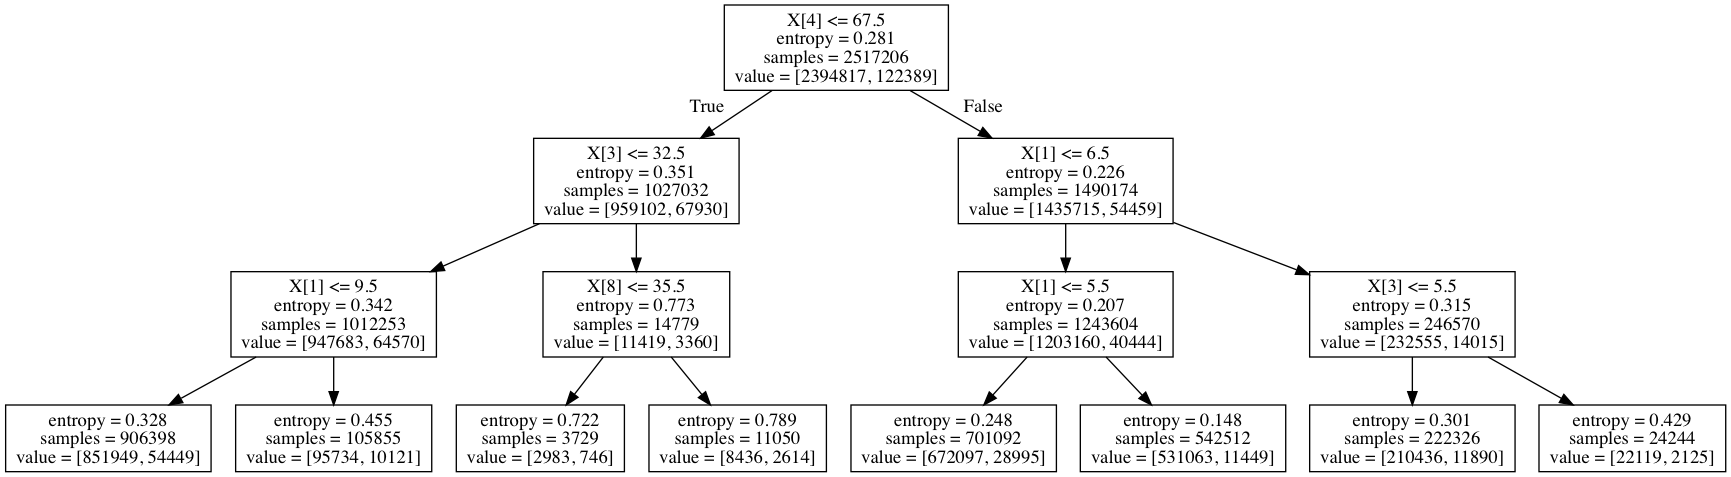

In [27]:
draw_decision_tree(tree)

In [28]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(train_x, train_y)))

훈련 세트 정확도: 0.951


In [29]:
print("특성 중요도:\n{}".format(tree.feature_importances_))


특성 중요도:
[0.         0.36375511 0.         0.18067261 0.45470191 0.
 0.         0.         0.00087037]


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_y, tree.predict(train_x))

array([[2394817,       0],
       [ 122389,       0]])

In [35]:
train_y

0          0
1          0
2          0
3          1
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
2517176    0
2517177    0
2517178    1
2517179    0
2517180    0
2517181    0
2517182    0
2517183    0
2517184    0
2517185    1
2517186    0
2517187    1
2517188    0
2517189    1
2517190    0
2517191    0
2517192    0
2517193    0
2517194    0
2517195    0
2517196    1
2517197    0
2517198    0
2517199    0
2517200    1
2517201    0
2517202    0
2517203    0
2517204    1
2517205    1
Name: PURCHASE_FLG, Length: 2517206, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [32]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(train_x, train_y)))

훈련 세트 정확도: 0.952


In [33]:
print("특성 중요도:\n{}".format(forest.feature_importances_))


특성 중요도:
[0.02225419 0.02699886 0.01345454 0.09826643 0.21415511 0.02215151
 0.0581925  0.0245152  0.52001165]


In [34]:
confusion_matrix(train_y, forest.predict(train_x))

array([[2393069,    1748],
       [ 120143,    2246]])